<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1CgZLW0IhOBSsf9fkKSrj8YQjNRhTmC5Y" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Grafos**

En matemáticas y ciencias de la computación, un grafo (del griego grafos: dibujo, imagen) es un conjunto de objetos llamados vértices o **nodos** unidos por enlaces llamados **aristas** o arcos, que permiten representar relaciones binarias entre elementos de un conjunto. Son objeto de estudio de la **teoría de grafos**.

## **El problema del viajante**

El problema del viajero (TSP por sus siglas en inglés, Travelling Salesman Problem) responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen?

El problema fue formulado por primera vez en 1930 y es uno de los problemas de optimización más estudiados. Es usado como prueba para muchos métodos de optimización. Aunque el problema es computacionalmente complejo, se conoce gran cantidad de heurísticas y métodos exactos, así que es posible resolver planteamientos concretos del problema desde cien hasta miles de ciudades.

El TSP tiene diversas aplicaciones aún en su formulación más simple, tales como: la planificación, la logística y la fabricación de circuitos electrónicos. Un poco modificado, aparece como subproblema en muchos campos como la secuenciación de ADN. En esta aplicación, el concepto de “ciudad” representa, por ejemplo: clientes, puntos de soldadura o fragmentos de ADN y el concepto de “distancia” representa el tiempo de viaje o costo, o una medida de similitud entre los fragmentos de ADN. En muchas aplicaciones, restricciones adicionales como el límite de recurso o las ventanas de tiempo hacen el problema considerablemente difícil.

*Wikipedia: https://es.wikipedia.org/wiki/Problema_del_viajante*

In [ ]:
!apt install libgraphviz-dev
!pip install -q pygraphviz

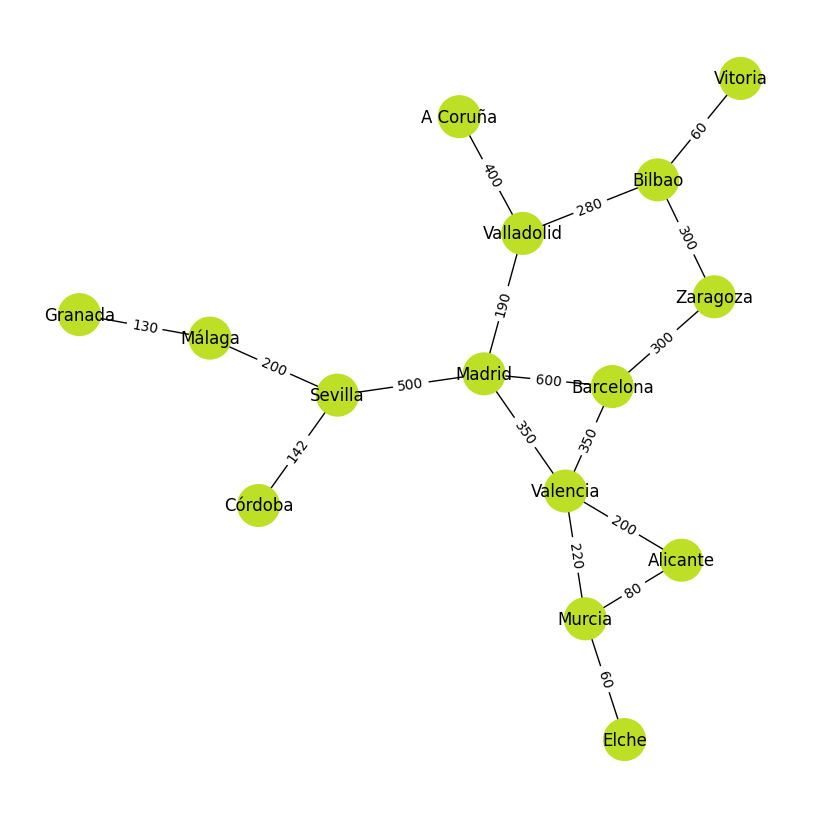

In [2]:
# La librería networkx nos permite trabajar con grafos e implementa una gran parte de los algoritmos relacionados con grafos.
# URL: https://networkx.org
import networkx as nx

# Con esta librería podemos dibujar gráficas simples o muy complejas.
import matplotlib.pyplot as plt

# Creamos un grafo vacío (G)
G = nx.Graph()

# Definimos vértices (que en nuestro caso serán ciudadesciudades)
# Observa: usamos una lista de strings, cada uno de ellos el nombre de una ciudad.
ciudades = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza',
            'Málaga', 'Murcia', 'Bilbao', 'Alicante', 'Córdoba', 'Valladolid',
            'A Coruña', 'Vitoria', 'Granada', 'Elche']

# Añadimos las ciudades como nodos (add_nodes_from ~ añade nodos desde; en este caso una lista)
G.add_nodes_from(ciudades)

# Definimos aristas con distancias (en km, valores ficticios generados por ChatGPT)
# observar: es una lista de tuplas, cada tupla tiene 3 elementos.
conexiones = [
    ('Madrid',     'Barcelona', 600),
    ('Madrid',     'Valencia',  350),
    ('Madrid',     'Sevilla',   500),
    ('Barcelona',  'Valencia',  350),
    ('Barcelona',  'Zaragoza',  300),
    ('Valencia',   'Alicante',  200),
    ('Sevilla',    'Málaga',    200),
    ('Málaga',     'Granada',   130),
    ('Zaragoza',   'Bilbao',    300),
    ('Bilbao',     'Vitoria',    60),
    ('Bilbao',     'Valladolid',280),
    ('Valladolid', 'Madrid',    190),
    ('Alicante',   'Murcia',     80),
    ('Murcia',     'Elche',      60),
    ('Murcia',     'Valencia',  220),
    ('A Coruña',   'Valladolid',400),
    ('Sevilla',    'Córdoba',   142)
]

# Y añadimos al grafo (G) las aristas, una por una.
for ciudad1, ciudad2, distancia in conexiones:
    G.add_edge(ciudad1, ciudad2, weight=distancia)

# Dibujamos el grafo
plt.figure(1, figsize=(8, 8))
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
labels = nx.get_edge_attributes(G, 'weight')
c = [0.9] * nx.number_of_nodes(G)
nx.draw(G, pos, node_size=900, node_color=c, vmin=0.0, vmax=1.0, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.show()


In [15]:
def resolver_tsp(G, nodo_inicial):
    # Calcular el ciclo del viajante de comercio más corto utilizando un algoritmo de aproximación
    ciclo = nx.approximation.traveling_salesman_problem(G, weight='weight', nodes=G.nodes, cycle=True)
    coste = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(ciclo))
    #if nodo_inicial not in ciclo: return None
    #index = ciclo.index(nodo_inicial)
    #ciclo=ciclo[index:] + ciclo[:index]
    return ciclo, coste

nodo_inicial = 'Madrid'
ciclo, distancia_total = resolver_tsp(G, nodo_inicial)

print("Orden de visita:")
for n in ciclo:
    print("  ", n)
print(f"Distancia total: {distancia_total} km")

Orden de visita:
   Madrid
   Sevilla
   Málaga
   Granada
   Málaga
   Sevilla
   Córdoba
   Sevilla
   Madrid
   Valencia
   Alicante
   Murcia
   Elche
   Murcia
   Valencia
   Barcelona
   Zaragoza
   Bilbao
   Vitoria
   Bilbao
   Valladolid
   A Coruña
   Valladolid
   Madrid
Distancia total: 5254 km


## **Grafo completo**

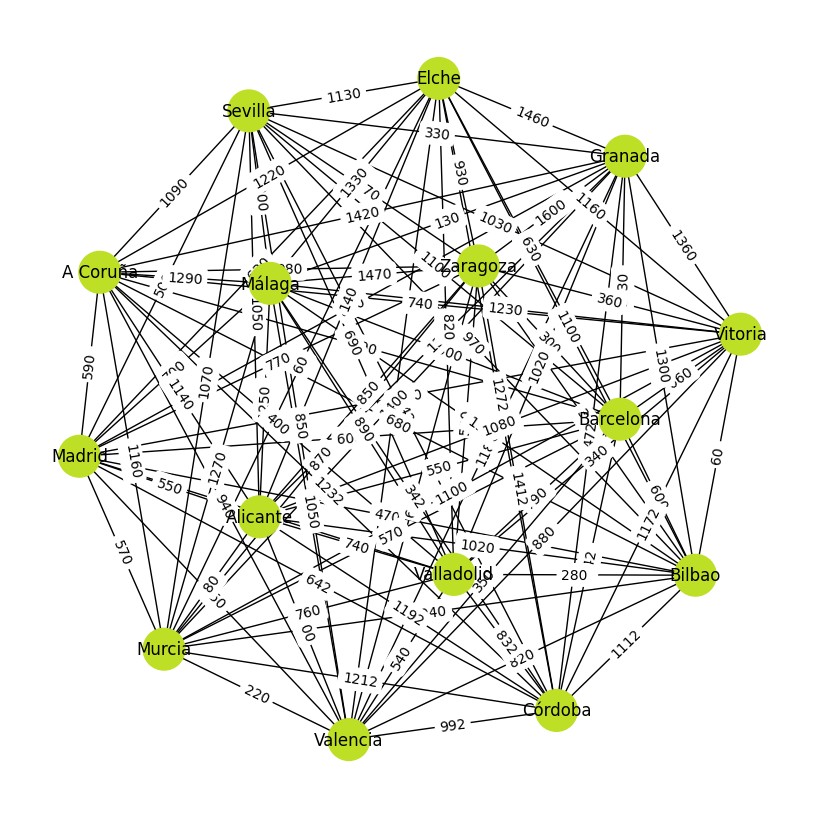

In [26]:
import copy

def completar_grafo(G_original):
    G_completo = copy.deepcopy(G_original)
    nodos = list(G_completo.nodes())
    for i in range(len(nodos)):
        for j in range(i+1, len(nodos)):
            nodo_i = nodos[i]
            nodo_j = nodos[j]
            if not G_completo.has_edge(nodo_i, nodo_j):
                try:
                    # Calcula la distancia más corta usando el algoritmo de Dijkstra
                    distancia = nx.shortest_path_length(G_original, source=nodo_i, target=nodo_j, weight='weight')
                except nx.NetworkXNoPath:
                    distancia = float('inf')  # No hay un camino entre nodo_i y nodo_j

                G_completo.add_edge(nodo_i, nodo_j, weight=distancia)
    return G_completo

# El algoritmo de resolución de TSP necesita tabajar sobre un grafo completo, esto es,
# todos los nodos se conectan con todos los nodos. Ese nuevo grafo (Ĝ) se calcula buscan la ruta más corta entre nodos.
Ĝ = completar_grafo(G);

# Dibujamos el grafo Ĝ
plt.figure(1, figsize=(8, 8))
pos = nx.nx_agraph.graphviz_layout(Ĝ, prog="neato")
labels = nx.get_edge_attributes(Ĝ, 'weight')
c = [0.9] * nx.number_of_nodes(Ĝ)
nx.draw(Ĝ, pos, node_size=900, node_color=c, vmin=0.0, vmax=1.0, with_labels=True)
nx.draw_networkx_edge_labels(Ĝ, pos, edge_labels=labels, font_size=10)
plt.show()


## **Árbol a partir de un grafo**

Un árbol es un tipo de grafo, aquel enque no hay ciclos; y, por tanto, de un nodo a otro hay **únicamente** un camino.

en este tipo de grafos existe un nodo raíz, y que solemos situar en el punto superior.

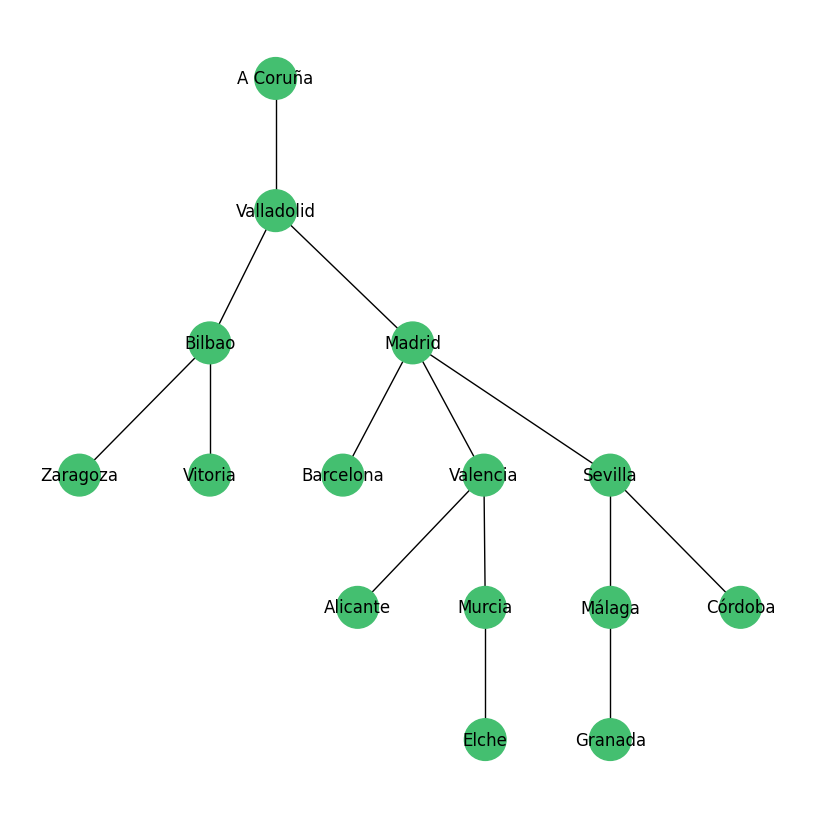

In [24]:
def generate_tree_from_graph(graph, root_node):
    # Crear un grafo vacío para almacenar el árbol
    tree = nx.Graph()

    # Utilizar BFS para recorrer el grafo y construir el árbol
    visited = set()
    queue = [(None, root_node)]  # El primer elemento es el nodo padre, el segundo es el nodo actual

    while queue:
        parent, current_node = queue.pop(0)
        if current_node not in visited:
            visited.add(current_node)
            if parent is not None:
                # Añadir la arista al árbol
                distance = graph[parent][current_node]['weight']
                tree.add_edge(parent, current_node, distance=distance)

            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    queue.append((current_node, neighbor))

    return tree

T = generate_tree_from_graph(G, 'A Coruña')

# Dibujamos el grafo Ĝ
plt.figure(1, figsize=(8, 8))
pos = nx.nx_agraph.graphviz_layout(T, prog="dot")
labels = nx.get_edge_attributes(T, 'weight')
c = [0.7] * nx.number_of_nodes(T)
nx.draw(T, pos, node_size=900, node_color=c, vmin=0.0, vmax=1.0, with_labels=True)
nx.draw_networkx_edge_labels(T, pos, edge_labels=labels, font_size=10)
plt.show()


## **Crecimiento exponencial**
Crecimiento de naturaleza combinatoria del número de estados del problema de las N reinas.

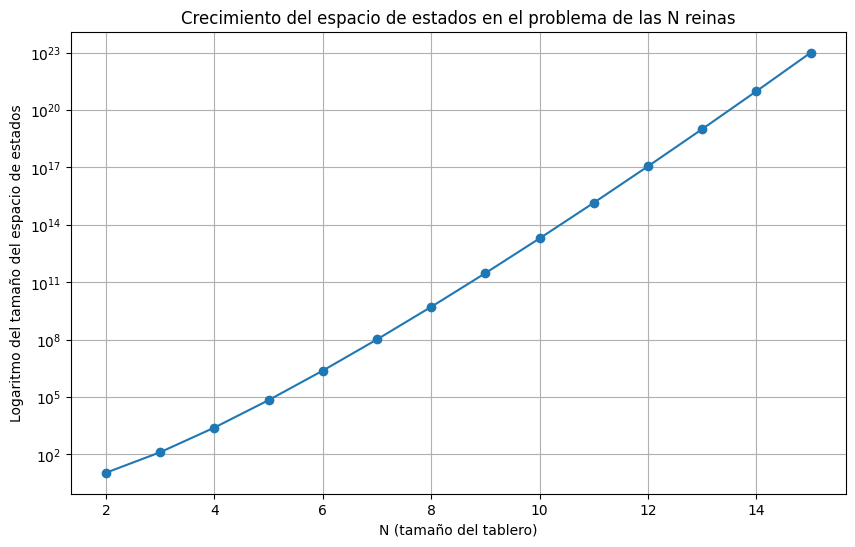

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import comb

def state_space_size(N):
    return sum(comb(N * N, k) for k in range(N + 1))

N_values = list(range(2, 16))  # Aquí puedes extender el rango si lo deseas
sizes = [state_space_size(N) for N in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, sizes, marker='o')
plt.yscale("log")  # Escala logarítmica en el eje de las ordenadas
plt.xlabel('N (tamaño del tablero)')
plt.ylabel('Logaritmo del tamaño del espacio de estados')
plt.title('Crecimiento del espacio de estados en el problema de las N reinas')
plt.grid(True)
plt.show()

